In [ ]:
!pip install imblearn

In [2]:
import os
import time
import pandas as pd
import numpy as np
import collections
import seaborn as sns
from sklearn import svm
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

#os.getcwd()

In [2]:
# Read Dataset
df = pd.read_csv('bank-additional.csv', sep=';')
df = df[['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week','y']]
print(df.shape)

          
# Create Training and Testing Data
X = df[['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week']]
y = df['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(collections.Counter(y_train),collections.Counter(y_test))

# View data
df.iloc[:10,:]

(4119, 11)
Counter({0: 2563, 1: 320}) Counter({0: 1105, 1: 131})


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,y
0,30,1,1,2,0,2,0,0,6,0,0
1,39,7,2,3,0,0,0,1,6,0,0
2,25,7,1,3,0,2,0,1,4,4,0
3,38,7,1,2,0,1,1,1,4,0,0
4,47,0,1,6,0,2,0,0,7,1,0
5,32,7,2,6,0,0,0,0,9,2,0
6,32,0,2,6,0,2,0,0,9,1,0
7,41,2,1,6,1,2,0,0,7,1,0
8,31,7,0,5,0,0,0,0,7,3,0
9,35,1,1,2,1,0,0,1,6,2,0


In [3]:
#Select numerical columns which need to be normalized
train_norm = X_train[X_train.columns[0:1]]
test_norm = X_test[X_test.columns[0:1]]

# Normalise training data
std_scale1 = preprocessing.StandardScaler().fit(train_norm)
x_train_norm = std_scale1.transform(train_norm)
training_norm_col = pd.DataFrame(x_train_norm, index=train_norm.index, columns=train_norm.columns)
X_train.update(training_norm_col)

# Normalise testing data
x_test_norm = std_scale1.transform(test_norm)
testing_norm_col = pd.DataFrame(x_test_norm, index=test_norm.index, columns=test_norm.columns)
X_test.update(testing_norm_col) # Update test data with normalised columns

C:\Users\Theodore\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:5804: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = expressions.where(mask, this, that)
C:\Users\Theodore\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:5804: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = expressions.where(mask, this, that)


In [5]:
# Train NB Classifer
nb = GaussianNB()
%time nb.fit(X_res, y_res)

# Make Predictions
train_pred = nb.predict(X_train)
test_pred = nb.predict(X_test)
pred_prob = nb.predict_proba(X_test)
ytest = y_test.astype(np.float64)
predictions = test_pred.astype(np.float64)
ytest = ytest.values
train_accuracy = np.sum(train_pred==y_train)/y_train.shape[0] * 100
test_accuracy = np.sum(test_pred==y_test)/y_test.shape[0] * 100
print("Training Accuracy: %.3f%%" % (train_accuracy))
print("Testing Accuracy: %.3f%%" % (test_accuracy))

tn, fp, fn, tp = confusion_matrix(y_test, test_pred).ravel()
print('tn:',tn, 'fp:',fp, 'fn:',fn, 'tp:',tp)

Wall time: 6.98 ms
Training Accuracy: 88.866%
Testing Accuracy: 89.239%
tn: 1095 fp: 10 fn: 123 tp: 8


## ROC

<Figure size 144x144 with 0 Axes>

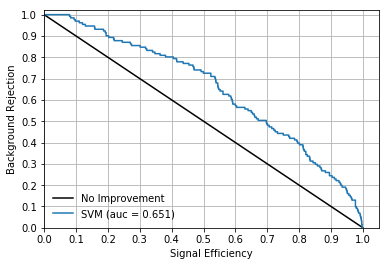

In [6]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

fpr, tpr, thresholds = roc_curve(y_test, pred_prob[:,1])
auc = auc(fpr,tpr)

plt.figure(figsize=(2,2))
plt.figure(facecolor="white")
plt.plot([0, 1], [1, 0], 'k-',label='No Improvement')
plt.plot(1-fpr, tpr, label='Naive Bayes (auc = %0.3f)'%auc)
plt.ylabel('Background Rejection')
plt.xlabel('Signal Efficiency')
plt.xlim([0.0,1.05])
plt.ylim([0.0,1.02])
plt.xticks(np.arange(0,1.05,0.1))
plt.yticks(np.arange(0,1.05,0.1))
plt.legend(frameon=False,loc=3)
plt.grid()
plt.show()